In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pygad
import wandb
import keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

tf.random.set_seed(0)
np.random.seed(0)

import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

2023-09-01 13:04:25.695784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-01 13:04:27.317562: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-01 13:04:27.976232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/macula/SMATousi/.conda/envs/mac-deep/lib/:/home/macula/SMATousi/.conda/envs/mac-deep/li

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8723659985458982648
xla_global_id: -1
]


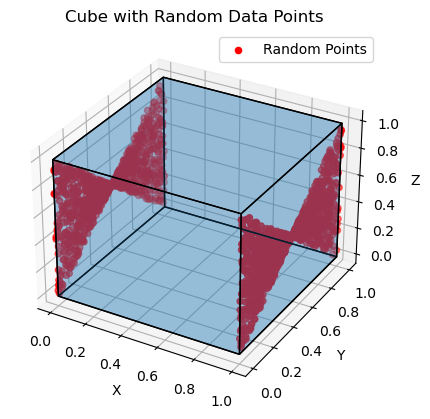

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Function to generate cube vertices
def generate_cube_vertices(size):
    vertices = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                x = i * size
                y = j * size
                z = k * size
                vertices.append([x, y, z])
    return vertices

# Function to generate random points on each face of the cube
def generate_random_points_on_all_cube_faces(vertices, num_points_per_face):
    points = []
    for _ in range(num_points_per_face):
        # Randomly choose a face
        face = random.choice(vertices)
        
        # Randomly choose a point within the face's bounds
        u = np.random.uniform(0, 1)
        v = np.random.uniform(0, 1)
        point = face[0] * (1 - u) * (1 - v) + face[1] * u * (1 - v) + face[2] * u * v + face[3] * (1 - u) * v
        points.append(point)
    return np.array(points)

# Function to plot a cube
def plot_cube(vertices, points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define cube edges
    edges = [
        [vertices[0], vertices[1], vertices[3], vertices[2]],
        [vertices[4], vertices[5], vertices[7], vertices[6]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[2], vertices[6], vertices[4]],
        [vertices[1], vertices[3], vertices[7], vertices[5]]
    ]

    # Plot cube edges
    ax.add_collection3d(Poly3DCollection(edges, edgecolors='k', alpha=0.25))

    # Plot data points on cube faces
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o', label='Random Points')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cube with Random Data Points')
    ax.legend()
    plt.show()

# Generate cube vertices with a given size
cube_size = 1.0
cube_vertices = generate_cube_vertices(cube_size)

# Generate random points on all six faces of the cube
num_points_per_face = 1000
random_points = generate_random_points_on_cube_faces(cube_vertices, num_points_per_face)

# Plot the cube with random data points
plot_cube(cube_vertices, random_points)


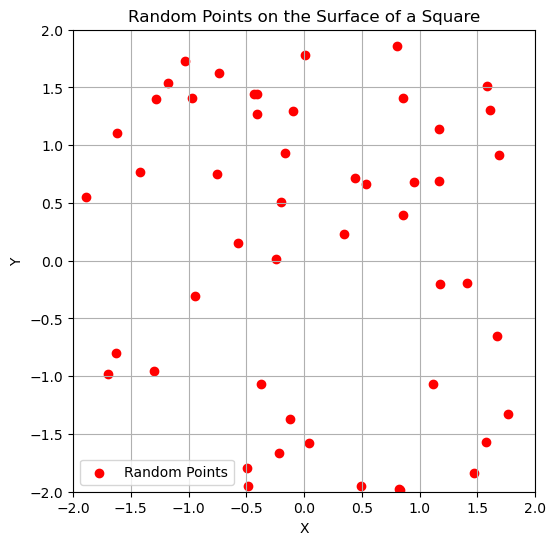

In [12]:


# Define the bounds of the square (assuming a square centered at the origin)
side_length = 4.0  # Adjust this as needed
x_min, x_max = -side_length / 2, side_length / 2
y_min, y_max = -side_length / 2, side_length / 2

# Number of random points to generate
num_points = 50  # Adjust this as needed

# Generate random points on the surface of the square
random_points = []
for _ in range(num_points):
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(y_min, y_max)
    random_points.append([x, y])

# Convert the list of random points to a NumPy array for easier manipulation
random_points = np.array(random_points)

# Plot the square and random points
plt.figure(figsize=(6, 6))
plt.scatter(random_points[:, 0], random_points[:, 1], c='r', marker='o', label='Random Points')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points on the Surface of a Square')
plt.legend()
plt.grid(True)
plt.show()


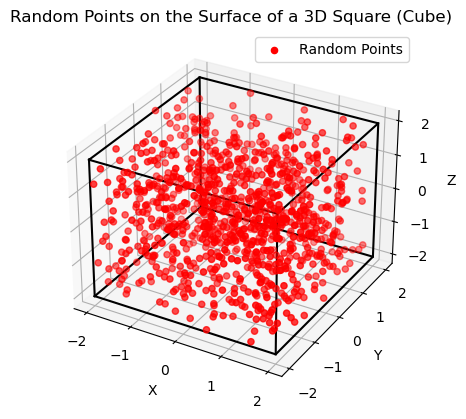

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Define the bounds of the 3D square (assuming a cube centered at the origin)
side_length = 4.0  # Adjust this as needed
x_min, x_max = -side_length / 2, side_length / 2
y_min, y_max = -side_length / 2, side_length / 2
z_min, z_max = -side_length / 2, side_length / 2

# Number of random points to generate
num_points = 1000  # Adjust this as needed

# Generate random points on the surface of the 3D square (cube)
random_points = []
for _ in range(num_points):
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(y_min, y_max)
    z = np.random.uniform(z_min, z_max)
    random_points.append([x, y, z])

# Convert the list of random points to a NumPy array for easier manipulation
random_points = np.array(random_points)

# Define the vertices of the cube
cube_vertices = np.array([
    [x_min, y_min, z_min],
    [x_max, y_min, z_min],
    [x_max, y_max, z_min],
    [x_min, y_max, z_min],
    [x_min, y_min, z_max],
    [x_max, y_min, z_max],
    [x_max, y_max, z_max],
    [x_min, y_max, z_max]
])

# Define the edges of the cube
cube_edges = [
    [cube_vertices[0], cube_vertices[1], cube_vertices[2], cube_vertices[3], cube_vertices[0]],
    [cube_vertices[4], cube_vertices[5], cube_vertices[6], cube_vertices[7], cube_vertices[4]],
    [cube_vertices[0], cube_vertices[4]],
    [cube_vertices[1], cube_vertices[5]],
    [cube_vertices[2], cube_vertices[6]],
    [cube_vertices[3], cube_vertices[7]]
]

# Plot the cube and random points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot cube edges
for edge in cube_edges:
    ax.plot([v[0] for v in edge], [v[1] for v in edge], [v[2] for v in edge], 'k')

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], random_points[:, 2], c='r', marker='o', label='Random Points')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Points on the Surface of a 3D Square (Cube)')
ax.legend()
plt.show()


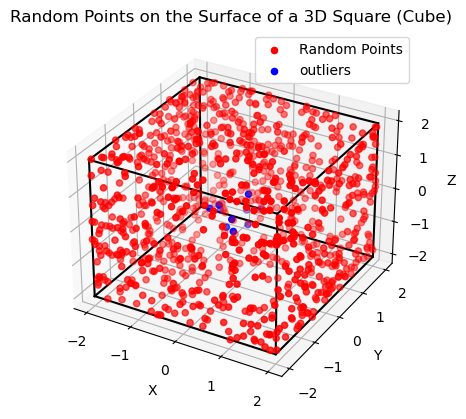

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

np.random.seed(0)

# Define the bounds of the 3D square (assuming a cube centered at the origin)
side_length = 4.0  # Adjust this as needed
x_min, x_max = -side_length / 2, side_length / 2
y_min, y_max = -side_length / 2, side_length / 2
z_min, z_max = -side_length / 2, side_length / 2

# Number of random points to generate
num_points = 1000  # Adjust this as needed

# Generate random points on the surface of the 3D square (cube)
random_points = []

for _ in range(num_points):
    axis = np.random.choice([0, 1, 2])  # Randomly select an axis (0 for x, 1 for y, 2 for z)
    sign = np.random.choice([-1, 1])   # Randomly select a sign (+1 or -1)

    if axis == 0:
        x = sign * side_length / 2
        y = np.random.uniform(y_min, y_max)
        z = np.random.uniform(z_min, z_max)
    elif axis == 1:
        x = np.random.uniform(x_min, x_max)
        y = sign * side_length / 2
        z = np.random.uniform(z_min, z_max)
    else:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        z = sign * side_length / 2

    random_points.append([x, y, z])

# Convert the list of random points to a NumPy array for easier manipulation
random_points = np.array(random_points)

# Plot the cube and random points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cube's faces
vertices = [
    [x_min, y_min, z_min],
    [x_max, y_min, z_min],
    [x_max, y_max, z_min],
    [x_min, y_max, z_min],
    [x_min, y_min, z_max],
    [x_max, y_min, z_max],
    [x_max, y_max, z_max],
    [x_min, y_max, z_max]
]

# Define the edges of the cube
cube_edges = [
    [vertices[0], vertices[1], vertices[2], vertices[3], vertices[0]],
    [vertices[4], vertices[5], vertices[6], vertices[7], vertices[4]],
    [vertices[0], vertices[4]],
    [vertices[1], vertices[5]],
    [vertices[2], vertices[6]],
    [vertices[3], vertices[7]]
]


num_points = 10  # Adjust this as needed

dim = 0.5
# Define the bounds for each axis
x_min, x_max = -dim, dim  # Adjust these bounds as needed
y_min, y_max = -dim, dim
z_min, z_max = -dim, dim

# Generate random 3D points within the specified bounds
outliers = np.random.uniform(low=(x_min, y_min, z_min), high=(x_max, y_max, z_max), size=(num_points, 3))


dataset = np.concatenate([random_points, outliers], axis = 0)

# Plot cube edges
for edge in cube_edges:
    ax.plot([v[0] for v in edge], [v[1] for v in edge], [v[2] for v in edge], 'k')

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], random_points[:, 2], c='r', marker='o', label='Random Points')
ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c='b', marker='o', label='outliers')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Points on the Surface of a 3D Square (Cube)')
ax.legend()
plt.show()
